In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## Variables

In [3]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

## Linear Model

In [4]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
        
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0

In [5]:
def loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [6]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = tf.random.normal(shape=(NUM_EXAMPLES,))
noise   = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

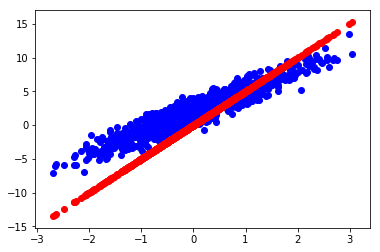

Current loss: 8.115806


In [8]:
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [10]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.11581
Epoch  1: W=4.65 b=0.38, loss=5.67366
Epoch  2: W=4.36 b=0.68, loss=4.06994
Epoch  3: W=4.12 b=0.93, loss=3.01662
Epoch  4: W=3.93 b=1.13, loss=2.32469
Epoch  5: W=3.77 b=1.29, loss=1.87008
Epoch  6: W=3.64 b=1.42, loss=1.57135
Epoch  7: W=3.54 b=1.52, loss=1.37502
Epoch  8: W=3.45 b=1.60, loss=1.24596
Epoch  9: W=3.38 b=1.67, loss=1.16112


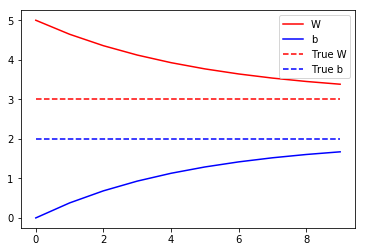

In [11]:
model = Model()

Ws, bs = list(), list()
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
    
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## The Iris classification problem

In [13]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /Users/vlsnk/.keras/datasets/iris_training.csv


In [16]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [19]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name  = column_names[-1]

print("Features: {}".format(', '.join(feature_names)))
print("Label: {}".format(label_name))

Features: sepal_length, sepal_width, petal_length, petal_width
Label: species


In [20]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [28]:
# Create a Tensorflow`s Dataset from CSV file

batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1,
)

In [31]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: id=814, shape=(32,), dtype=float32, numpy=
array([5.1, 6.3, 4.8, 5.8, 6.1, 5. , 5.9, 6.7, 6.9, 5.5, 4.9, 4.8, 5.5,
       5.6, 5.2, 6.8, 6.7, 5.7, 4.5, 4.9, 5.1, 7.4, 6.5, 7.7, 4.6, 6.6,
       6.7, 5. , 6.4, 5.1, 7.2, 5.4], dtype=float32)>), ('sepal_width', <tf.Tensor: id=815, shape=(32,), dtype=float32, numpy=
array([3.8, 3.3, 3. , 2.7, 2.8, 3.4, 3. , 3. , 3.1, 2.4, 3. , 3. , 2.6,
       2.7, 3.4, 3. , 3.1, 4.4, 2.3, 2.5, 3.8, 2.8, 3. , 2.6, 3.6, 2.9,
       3.3, 3.5, 3.2, 2.5, 3.2, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: id=812, shape=(32,), dtype=float32, numpy=
array([1.6, 6. , 1.4, 4.1, 4. , 1.6, 5.1, 5.2, 5.1, 3.7, 1.4, 1.4, 4.4,
       4.2, 1.4, 5.5, 4.4, 1.5, 1.3, 4.5, 1.9, 6.1, 5.2, 6.9, 1. , 4.6,
       5.7, 1.6, 5.3, 3. , 6. , 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: id=813, shape=(32,), dtype=float32, numpy=
array([0.2, 2.5, 0.1, 1. , 1.3, 0.4, 1.8, 2.3, 2.3, 1. , 0.2, 0.3, 1.2,
       1.3, 0.2, 2.1, 1.4, 0.

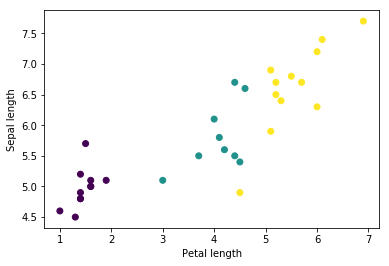

In [37]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [38]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [39]:
train_dataset = train_dataset.map(pack_features_vector)

In [41]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.1 3.  4.9 1.8]
 [4.6 3.6 1.  0.2]
 [5.5 3.5 1.3 0.2]
 [4.4 3.  1.3 0.2]
 [5.6 2.5 3.9 1.1]], shape=(5, 4), dtype=float32)


In [42]:
model = keras.Sequential([
    layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    layers.Dense(10, activation=tf.nn.relu),
    layers.Dense(3)
])

In [43]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [44]:
def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 1.410901665687561


In [45]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [46]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [47]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.410901665687561
Step: 1,         Loss: 1.2363044023513794


In [48]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = keras.metrics.Mean()
    epoch_accuracy = keras.metrics.SparseCategoricalAccuracy()
    
    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(y, model(x))
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.048, Accuracy: 41.667%
Epoch 050: Loss: 0.094, Accuracy: 96.667%
Epoch 100: Loss: 0.055, Accuracy: 99.167%
Epoch 150: Loss: 0.051, Accuracy: 99.167%
Epoch 200: Loss: 0.061, Accuracy: 97.500%


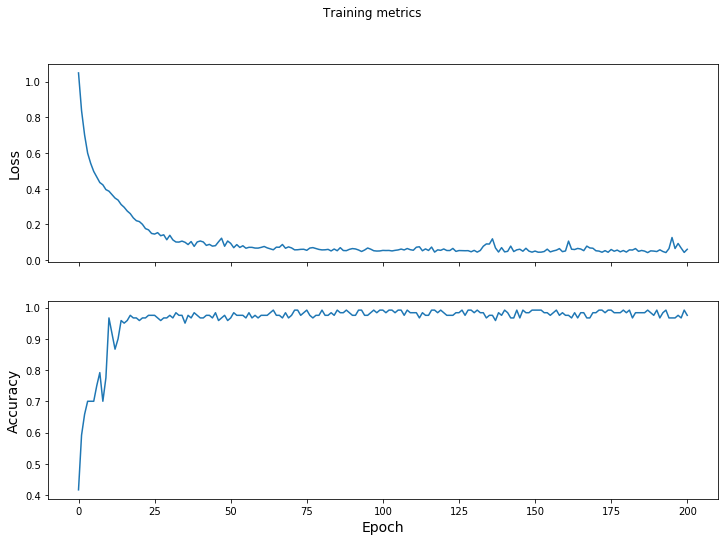

In [50]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training metrics')

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

In [51]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 3us/step


In [52]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [53]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
